In [1]:
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools 
import random
import numpy as np
import matplotlib.lines as mlines
import pickle
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)
def load_file(f):
    with open(f, "rb") as rb:
        pickle.load(rb)
        #return pickle.load(rb)
        return CPU_Unpickler(rb).load()

In [2]:
def choice_lr(net,s,s0,L):
    if net =='lcn' or net=='lcn_shared':
        if s>2:
            lr = .003
        else:
            if s0<4:
                lr = 0.01
            else:
                lr = 0.003
    elif net=='fcn2':
        if L==2:
            if s0<4:
                lr = 0.01
            else:
                lr = 0.003
        else:
            if s0<4:
                lr = 0.003
            else:
                lr = 0.001
    elif net=="cnn2" or net=='cnn2_shared' or net=='cnn2-hom':
        if s>2:
            if s0<4:
                lr = 0.01
            elif s0==4:
                lr = 0.003
            elif s0==6:
                lr = 0.0003

        else:
            if s0>0:
                if L>=3:
                    if s0<4:
                        lr = 0.01
                    elif s0==4:
                        lr = 0.003
                    else:
                        lr = 0.001
                elif L==2:
                    if s0<4:
                        lr = 0.1
                    elif s0==4:
                        lr = 0.03
                    else:
                        lr = 0.01
            else:
                lr = 0.01
            if L==1:
                if s0<4:
                    lr = 0.1
                else:
                    lr = .03
    return lr

def training_point(net,s,s0,L,n,m):
    if net=='lcn' or net=='lcn_shared':
        if s==2:
            p_pred = n**(L)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


            if s0 <4:
                xx= np.logspace(np.log10(int(p_pred)),np.log10(200*p_pred),15)
                xx =xx[:-1]
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(500*p_pred),15)
                xx =xx[:-1]
                #xx1 = np.array([107999,135917])
                #xx = np.concatenate((xx,xx1))
        if s>2:
            p_pred = ((s0+1)**L)*m**(L)
            
            xx= np.logspace(np.log10(int(0.1*p_pred)),np.log10(10*p_pred),10)
            xx1 = np.logspace(np.log10(10*p_pred),np.log10(100*p_pred),10)
            xx = np.concatenate((xx,xx1))
    elif  net=='fcn2':
        if s==2:
            p_pred = n**(L)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


            if s0 <4:
                xx= np.logspace(np.log10(int(p_pred)),np.log10(200*p_pred),15)
                xx =xx[:-1]
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(500*p_pred),15)
                xx =xx[:-1]
                #xx1 = np.array([107999,135917])
                #xx = np.concatenate((xx,xx1))
        #elif s==2 and L==3:
        #    p_pred = n**(L)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


        #    if s0 <4:
        #        xx= np.logspace(np.log10(int(p_pred)),np.log10(400*p_pred),15)
        #        xx =xx[:-1]
        #    else:
        #        xx= np.logspace(np.log10(p_pred),np.log10(600*p_pred),15)
        #        xx =xx[:-1]
                #xx1 = np.array([107999,135917])
                #xx = np.concatenate((xx,xx1))
        elif s>2:
            p_pred = m**(L) #((s0+1)**L)*m**(L)
            
            xx= np.logspace(np.log10(int(0.1*p_pred)),np.log10(10*p_pred),10)
            xx1 = np.logspace(np.log10(10*p_pred),np.log10(50*p_pred),7)
            xx = np.concatenate((xx,xx1))
    else:
        if s>2: 
            p_pred = n**(L)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


            if s0 <=4:
                xx= np.logspace(np.log10(int(p_pred)),np.log10(100*p_pred),15)
                xx =xx[:-1]
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(500*p_pred),15)
                xx =xx[:-1]
                #xx1 = np.array([107999,135917])
                #xx = np.concatenate((xx,xx1))

            if s==3 or s==4:
                if L==2:
                    xx1= np.logspace(np.log10(100*p_pred),np.log10(500*p_pred),15)
                    xx = np.concatenate((xx,xx1))
                    xx1= np.logspace(np.log10(500*p_pred),np.log10(1000*p_pred),15)
                    xx = np.concatenate((xx,xx1))
                if s==4:
                    xx1= np.logspace(np.log10(1000*p_pred),np.log10(2000*p_pred),10)                            
                    xx = np.concatenate((xx,xx1))
                    xx1= np.logspace(np.log10(2000*p_pred),np.log10(10000*p_pred),10)                            
                    xx = np.concatenate((xx,xx1))
                    xx1= np.logspace(np.log10(10000*p_pred),np.log10(50000*p_pred),10)                            
                    xx = np.concatenate((xx,xx1))
                if s==3 and s0==4:
                    xx1= np.logspace(np.log10(int(1000*p_pred)),np.log10(10000*p_pred),10)
                    xx = np.concatenate((xx,xx1))
        else:
            p_pred = n**(L+1)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            if L>1:
                if s0>0:
                    if L>=3:
                        pmax = 110000

                        if s0 <4:
                            xx= np.logspace(np.log10(p_pred),np.log10(100*p_pred),15)

                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
                        if s0==1:
                            if n==8 or n==10:
                                xx0 = np.logspace(np.log10(int(0.1*p_pred)),np.log10(p_pred),5)
                                xx0 = xx0[:-1]
                                xx = np.concatenate((xx0,xx))
                    elif L==2:
                        pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                        p_pred = n**(L+1)
                        p_max_used = min(pmax,110000)
                        #p_pred = n**(L+1)
                        if s0>=4:
                            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
                        
                        xx0 = np.logspace(np.log10(int(0.1*p_pred)),np.log10(p_pred),5)
                        xx0 = xx0[:-1]
                        xx = np.concatenate((xx0,xx))
                else:
                    p_pred_red = n**L
                    xx= np.logspace(np.log10(int(0.2*p_pred_red)),np.log10(100*p_pred_red),15)
            else:
                p_pred_1 = n**L
                if s0 <4:
                    xx= np.logspace(np.log10(p_pred_1),np.log10(200*p_pred_1),15)

                else:
                    xx= np.logspace(np.log10(p_pred_1),np.log10(500*p_pred_1),15)
            if s==3:
                p_pred = (s0+1)*m**(L)
                #p_max_used = min(pmax,110000)
                #p_pred = n**(L+1)
                if s0 <= 4:
                    #xx1= np.logspace(np.log10(int(1000*p_pred)),np.log10(2000*p_pred),10)
                    #xx = np.concatenate((xx,xx1))
                    xx= np.logspace(np.log10(int(0.1*p_pred)),np.log10(10*p_pred),15)
            xx =xx[:-1]
    return xx

def load_net(net,ptr,n,m,L,s0,s,seed,width,lr):
    #print("kk")
    #print("cnn-hom/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    #print("fcn2_data/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

    tmp = load_file("fcn2_data/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    #print("fcn2_data/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
          
    return tmp


def training_point_new(xx,net,n,m,L,s0,s,width,lr):
    xx_new = []
                
    for ptrx in xx:

        #print(ptrx,pmax)
        ptr = int(ptrx) 


        tmp_seed = 0

        num_seeds = 0
        for (idx_seed,seed) in enumerate(np.array([1])):

            try:

                tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr)
                tmp_seed += (100-tmp[choice]["acc"])/100
                num_seeds +=1
                xx_new.append(ptr)
            except:
                #if s>2:
                #    print("cnn_s_max/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                #print(ptr,net,n,m,L,s0,s,width,lr)
                pass
    xx_new = torch.tensor(xx_new)
    return xx_new



In [3]:
##TASK TASK TASK




###### L=3 ########
#NO WHITENING
choice = "best"

seed = 0
nets =["fcn2"]#

def find_closest_position(lst, target):
    closest_index = min(range(len(lst)), key=lambda i: abs(lst[i] - target))
    return closest_index
ns = np.array([6])
sss = [2]
s0s = [0,1,2]
Ls= [2,3]
bs = 20
pstars = torch.zeros(1)

for (idx_L,L) in enumerate(Ls):
    #print('L: '+str(L))
    for (idx_s,s) in enumerate(sss):
        #print('s: '+str(s))

        for (idx_s0,s0) in enumerate(s0s):
            #print('s0: '+str(s0))


            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                
                
                for (idxnet,net) in enumerate(nets):
                    #print(n)
                    #lr = choice_lr(net,s,s0,L)
                    ''''
                    accs_cnn = []
                    
                    xx = training_point(net,s,s0,L,n)

                    xx_new = training_point_new(xx,net,n,m,L,s0,s,width,lr)

                    for ptrx in xx_new:

                        #print(ptrx,pmax)
                        ptr = int(min(ptrx,pmax)) 

                        if ptr<pmax:
                            tmp_seed = 0

                            num_seeds = 0
                            for (idx_seed,seed) in enumerate(np.array([1])):
                                try:
                                    tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr)
                                    tmp_seed += (100-tmp[choice]["acc"])/100
                                    num_seeds +=1
                                except:
                                    pass
                            if num_seeds>0:
                                accs_cnn.append(tmp_seed/num_seeds)
                    '''
                    #try:
                    #print('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                    '''
                    if (L==3 and s==2) or (s==3 and n==4) or (s==4 and L==2) or (L==2 and s==3 and n==6):
                        print('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        if L==3 and s0==0:
                            print(mat_terr)
                            print(xx)

                    else:
                        #print('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                        mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_%s.pt'%(L,n,m,s0,s,bs,net))

                        if (n==6 and s==2 and L==2):
                            xx= training_point(net,s,s0,L,n,m)
                        else:    
                            xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                    '''    
                    if len(xx):
                        target_value = 0.1
                        #print("ok")
                        closest_index = find_closest_position(mat_terr, target_value)

                        if abs(target_value - mat_terr[closest_index])<= .1:
                            pstars[0] = int(xx[closest_index])

                        torch.save(pstars,'pstars/pstars_task_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')          
                        print(pstars)
                        print(pstars,'pstars/pstars_task_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')          
                        px = torch.load('pstars/pstars_task_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')          
                        print('checl')
                        print(px)
                        #pstars_task_fcn2_L_3_n_6_m_6_s_2_s0_0_net_fcn2.pt

                    #except:
                        #print('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                    #    print('L,s,s0,n')
                    #    print(L,s,s0,n)
                    

tensor([348.])
tensor([348.]) pstars/pstars_task_fcn2_L_2_n_6_m_6_s_2_s0_0_net_fcn2.pt
checl
tensor([348.])
tensor([1584.])
tensor([1584.]) pstars/pstars_task_fcn2_L_2_n_6_m_6_s_2_s0_1_net_fcn2.pt
checl
tensor([1584.])
tensor([3377.])
tensor([3377.]) pstars/pstars_task_fcn2_L_2_n_6_m_6_s_2_s0_2_net_fcn2.pt
checl
tensor([3377.])
tensor([9507.])
tensor([9507.]) pstars/pstars_task_fcn2_L_3_n_6_m_6_s_2_s0_0_net_fcn2.pt
checl
tensor([9507.])
tensor([9507.])
tensor([9507.]) pstars/pstars_task_fcn2_L_3_n_6_m_6_s_2_s0_1_net_fcn2.pt
checl
tensor([9507.])
tensor([9507.])
tensor([9507.]) pstars/pstars_task_fcn2_L_3_n_6_m_6_s_2_s0_2_net_fcn2.pt
checl
tensor([9507.])


In [4]:
## Sem
#DIFFERENT LAYERS PERTURB


###### L=3 ########
#NO WHITENING
choice = "best"

width = 512
seed = 0
nets =["fcn2"]#

def find_closest_position(lst, target):
    closest_index = min(range(len(lst)), key=lambda i: abs(lst[i] - target))
    return closest_index
    
ns = ns = np.array([6])
sss = [2]
s0s = [0,1,2]
Ls= [2,3]
bs = 20
pstars_pos = torch.zeros(1)
pstars_sem = torch.zeros(1)
for (idx_L,L) in enumerate(Ls):
    #print('L: '+str(L))
    for (idx_s,s) in enumerate(sss):
        #print('s: '+str(s))

        for (idx_s0,s0) in enumerate(s0s):
            #print('s0: '+str(s0))


            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                
                for (idxnet,net) in enumerate(nets):
                    #print(n)
                    #lr = choice_lr(net,s,s0,L)
                    ''''
                    accs_cnn = []
                    
                    xx = training_point(net,s,s0,L,n)

                    xx_new = training_point_new(xx,net,n,m,L,s0,s,width,lr)

                    for ptrx in xx_new:

                        #print(ptrx,pmax)
                        ptr = int(min(ptrx,pmax)) 

                        if ptr<pmax:
                            tmp_seed = 0

                            num_seeds = 0
                            for (idx_seed,seed) in enumerate(np.array([1])):
                                try:
                                    tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr)
                                    tmp_seed += (100-tmp[choice]["acc"])/100
                                    num_seeds +=1
                                except:
                                    pass
                            if num_seeds>0:
                                accs_cnn.append(tmp_seed/num_seeds)
                    '''
                    try:

                        mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        '''  
                        if (L==3 and s==2) or (s==3 and n==4) or (s==4 and L==2)or (L==2 and s==3 and n==6):
                            mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_cnn.pt'%(L,n,m,s0,s,bs))
                            mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_cnn.pt'%(L,n,m,s0,s,bs))
                            xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_cnn.pt'%(L,n,m,s0,s,bs))
                        else:
                            mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                            mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                            if (n==6 and s==2 and L==2):
                                xx= training_point(net,s,s0,L,n,m)
                            else:    
                                xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                        '''  
                        
                        if len(xx):
                            '''
                            if L==2:
                                target_value_sem = 0.3
                            elif L==3:
                                target_value_sem = 0.3
                            '''
                            target_value_sem = 0.2
                            
                            #print(mat_terr)
                            #closest_index_pos = find_closest_position(mat_all_pos[:,1,0], target_value)
                            closest_index_sem = find_closest_position(mat_all_sem[:,L,0], target_value_sem)
                            #print(closest_index_sem)
                            #if abs(target_value - mat_all_pos[closest_index_pos])<= .1:
                            #    pstars_pos[0] = int(xx[closest_index_pos])
                            if abs(target_value_sem - mat_all_sem[closest_index_sem,L,0])<= .5:
                                #print('ok')
                                pstars_sem[0] = int(xx[closest_index_sem])
                            print(pstars_sem)
                            #torch.save(pstars_pos,'pstars/pstars_pos_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+'.pt')          
                            torch.save(pstars_sem,'pstars/pstars_sem_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')  
                    except:
                        #print('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                        print('L,s,s0,n')
                        print(L,s,s0,n)
                        pass

tensor([238.])
tensor([1085.])
tensor([3377.])
tensor([6511.])
tensor([29588.])
tensor([29588.])


In [5]:
##pos
#DIFFERENT LAYERS PERTURB



###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["fcn2"]#

def find_closest_position(lst, target):
    closest_index = min(range(len(lst)), key=lambda i: abs(lst[i] - target))
    return closest_index
ns  = np.array([6])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))
sss = [2]
s0s = [0,1,2]
Ls= [2,3]
bs = 20
pstars_pos = torch.zeros(1)
pstars_sem = torch.zeros(1)
for (idx_L,L) in enumerate(Ls):
    #print('L: '+str(L))
    for (idx_s,s) in enumerate(sss):
        #print('s: '+str(s))

        for (idx_s0,s0) in enumerate(s0s):
            #print('s0: '+str(s0))


            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                
                col = colors[idxn]
                for (idxnet,net) in enumerate(nets):
                    #print(n)
                    #lr = choice_lr(net,s,s0,L)
                    ''''
                    accs_cnn = []
                    
                    xx = training_point(net,s,s0,L,n)

                    xx_new = training_point_new(xx,net,n,m,L,s0,s,width,lr)

                    for ptrx in xx_new:

                        #print(ptrx,pmax)
                        ptr = int(min(ptrx,pmax)) 

                        if ptr<pmax:
                            tmp_seed = 0

                            num_seeds = 0
                            for (idx_seed,seed) in enumerate(np.array([1])):
                                try:
                                    tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr)
                                    tmp_seed += (100-tmp[choice]["acc"])/100
                                    num_seeds +=1
                                except:
                                    pass
                            if num_seeds>0:
                                accs_cnn.append(tmp_seed/num_seeds)
                    '''
                    try:
                        mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_%s.pt'%(L,n,m,s0,s,bs,net))
                        '''
                        if (L==3 and s==2) or (s==3 and n==4) or (s==4 and L==2) or (L==2 and s==3 and n==6):
                            mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_cnn.pt'%(L,n,m,s0,s,bs))
                            mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_cnn.pt'%(L,n,m,s0,s,bs))
                            xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_cnn.pt'%(L,n,m,s0,s,bs))
                        else:
                            mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                            mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                            if (n==6 and s==2 and L==2):
                                xx= training_point(net,s,s0,L,n,m)
                            else:    
                                xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                        '''  
                        if len(xx):
                            target_value_pos = 0.2
                            #print(mat_terr)
                            #closest_index_pos = find_closest_position(mat_all_pos[:,1,0], target_value)
                            closest_index_pos = find_closest_position(mat_all_pos[:,L,0], target_value_pos)
                            #print(closest_index_pos)
                            #if abs(target_value - mat_all_pos[closest_index_pos])<= .1:
                            #    pstars_pos[0] = int(xx[closest_index_pos])
                            if abs(target_value_pos - mat_all_pos[closest_index_pos,L,0])<= .5:
                                #print('ok')
                                pstars_pos[0] = int(xx[closest_index_pos])
                             
                        #torch.save(pstars_pos,'pstars/pstars_pos_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+'.pt')          
                            torch.save(pstars_pos,'pstars/pstars_pos_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')     
                            #print('L,s,s0,n')
                            print(pstars_pos)
                    except:
                        #print('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_cnn.pt'%(L,n,m,s0,s))
                        print('L,s,s0,n')
                        print(L,s,s0,n)
                        pass

tensor([36.])
tensor([509.])
tensor([1085.])
tensor([315.])
tensor([29588.])
tensor([29588.])


4
6
2 6
[348.] [238.]
8
2 8
[619.] [424.]
4
6
2 6
[1584.] [1085.]
8
2 8
[2816.] [1929.]
4
6
2 6
[3377.] [3377.]
8
2 8
[4112.] [6004.]
4
3 4
[1929.] [905.]
6
3 6
[9507.] [6511.]
8
3 8
[15434.] [10571.]
4
3 4
[12800.] [38399.]
6
3 6
[9507.] [29588.]
8
3 8
[102399.] [307199.]
4
3 4
[12800.] [12800.]
6
3 6
[9507.] [29588.]
8
[1428.] [2457592.]
[3054.] [384296.]


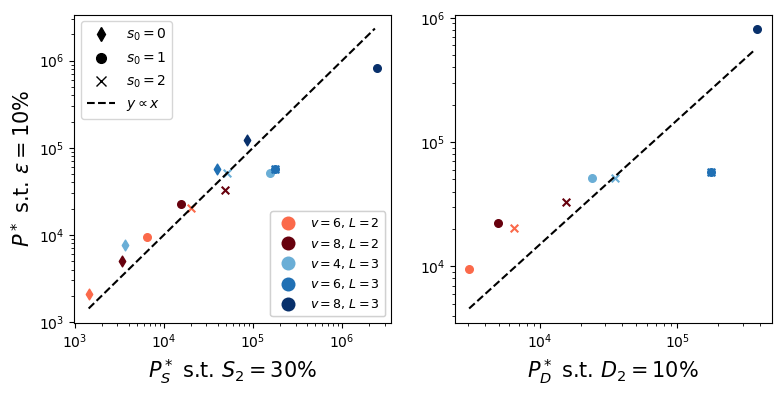

In [6]:
ns = ns = np.array([4,6,8])
s0s = [0,1,2]
    
Ls= [2,3]
sss = [2]
net = 'fcn2'
colors = cm.rainbow(np.linspace(0, 1, len(ns)))


cmap = plt.cm.get_cmap('Reds')

# Get the colorbar limits
vmin, vmax = 0.5, 1  # Assuming colorbar limits

# Sample k uniformly spaced points between vmin and vmax
sampled_values = np.linspace(vmin, vmax, 2)

# Convert sampled values to colors using the colormap
shades_of_red = [cmap(value) for value in sampled_values]


# Define shades of blue (from dark to light)
#shades_of_blue = ['#00008B', '#191970', '#000080', '#4169E1', '#1E90FF', '#87CEEB'][::-1]

cmap = plt.cm.get_cmap('Blues')

# Get the colorbar limits
vmin, vmax = 0.5, 1  # Assuming colorbar limits

# Sample k uniformly spaced points between vmin and vmax
sampled_values = np.linspace(vmin, vmax, 3)

# Convert sampled values to colors using the colormap
shades_of_blue = [cmap(value) for value in sampled_values]

colors_s3 = shades_of_red + shades_of_blue



fig, axs = plt.subplots(1,2, figsize = (9,4))





for (idx_s,s) in enumerate(sss):
    if s==2:
        idxx = 0
    elif s==3:
        idxx = 1
    #print('s: '+str(s))
    vs0 = []
    vs1 = []
    vs2 = []
    for (idx_L,L) in enumerate(Ls):
        #print('L: '+str(L))
        expo = L
        if L==2:
            alpha = 1
            size = 30
        elif L==3:
            alpha = 1
            size =30
        

        for (idx_s0,s0) in enumerate(s0s):
            #print('s0: '+str(s0))

            if s0==0:
                mar = "d"
            elif s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            for (idxn,n) in enumerate(ns):
                m = n**(s-1)
                print(n)

                try:
                    pstars_task = torch.load('pstars/pstars_task_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt') 
                    if s0>0:
                        pstars_pos = torch.load('pstars/pstars_pos_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')
                        pstars_pos = np.array(pstars_pos)
                    pstars_sem = torch.load('pstars/pstars_sem_'+net+'_L_'+str(L)+'_n_'+str(n)+'_m_'+str(m)+'_s_'+str(s)+'_s0_'+str(s0)+"_net_"+net+'.pt')
                    pstars_task = np.array(pstars_task)
                    
                    pstars_sem = np.array(pstars_sem)
                    print(L,n)
                    print(pstars_task,  pstars_sem)
                    col = colors[idxn]
                    if n==4 and L==2:
                        col = colors_s3[0]
                    if n==6 and L==2:
                        col = colors_s3[0]
                    if n==8 and L==2:
                        col = colors_s3[1]
                    if n==4 and L==3:
                        col = colors_s3[2]
                    if n==6 and L==3:
                        col = colors_s3[3]
                    if n==8 and L==3:
                        col = colors_s3[4]    
 
                    if pstars_task:
                        pstars_task = pstars_task*n
                        pstars_sem = pstars_sem*n
                        if s0>0: pstars_pos = pstars_pos*n
                    
                        
                        axs[0].scatter([pstars_sem ],[pstars_task],label = r'v: %d'%(n),marker = mar,color = col, alpha = alpha,s = size)
                        if s0>0:
                            axs[1].scatter([pstars_pos],[pstars_task],marker = mar,color = col, alpha = alpha,s = size)
                            vs2+=[pstars_pos]

                        vs1+=[pstars_sem ]
                        
                        #print('ok')
                except:
                    pass
                
    
    min0 = min(vs1)
    max0 = max(vs1)
    print(min0,max0)
    ps = np.arange(min0,max0,(max0-min0)/20) 
    axs[0].plot(ps,1*ps,color='black',ls='--')
    min0 = min(vs2)
    max0 = max(vs2)
    print(min0,max0)
    ps = np.arange(min0,max0,(max0-min0)/20) 
    axs[1].plot(ps,1.5*ps,color='black',ls='--')
    
    #axs[1].plot(ps,1*ps,label=r'$y=x$',color='black',ls='--')

axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_yscale('log')


#axs[0].set_xlabel(r'$(2^{L/2})(s_0+1)^{L} n_c m^{L}$',size = 15)
axs[1].set_xlabel(r'$P_D^*$ s.t. $D_{2} = 10\%$',size = 15)
axs[0].set_xlabel(r'$P_S^*$ s.t. $S_{2} = 30\%$',size = 15)
axs[0].set_ylabel(r'$P^*$ s.t. $\varepsilon= 10\%$',size = 15)

#L3 = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
#              markersize=7, label=r'$L=3$')

s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')

yx = mlines.Line2D([], [], color='black', linestyle='--',
              markersize=3, label=r'$y\propto x$')

s2 = mlines.Line2D([], [], color='black', marker='o',  linestyle='None',
              markersize=3, label=r'$L=2$')
s3 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=9, label=r'$L=3$')

#first_legend = axs[0].legend()
#ax = axs[0].add_artist(first_legend)

leg1 = axs[0].legend(handles=[s00,s01,s02,yx],loc = 'upper left') 
ax = axs[0].add_artist(leg1)

v0 = mlines.Line2D([], [], color=colors_s3[0], marker='o',  linestyle='None',
              markersize=9, label=r'$v=4$, $L=2$')
v1 = mlines.Line2D([], [], color=colors_s3[0], marker='o', linestyle='None',
              markersize=9, label=r'$v=6$, $L=2$')
v2 = mlines.Line2D([], [], color=colors_s3[1], marker='o', linestyle='None',
              markersize=9, label=r'$v=8$, $L=2$')
v3 = mlines.Line2D([], [], color=colors_s3[2], marker='o',  linestyle='None',
              markersize=9, label=r'$v=4$, $L=3$')
v4 = mlines.Line2D([], [], color=colors_s3[3], marker='o', linestyle='None',
              markersize=9, label=r'$v=6$, $L=3$')
v5 = mlines.Line2D([], [], color=colors_s3[4], marker='o', linestyle='None',
              markersize=9, label=r'$v=8$, $L=3$')

first_legend_2 = axs[0].legend(handles=[v1,v2,v3,v4,v5], fontsize=9,loc = 'lower right')
ax = axs[0].add_artist(first_legend_2)


plt.savefig("figures/pstar_tasksempos_fcn_s0_L_all.png" , bbox_inches='tight')
plt.savefig("figures/pstar_tasksempos_fcn_s0_L_all.pdf" , bbox_inches='tight')